In [1]:
import pandas as pd

In [2]:
df_sns = pd.read_csv('data/snsdata.csv')

In [3]:
df_sns = df_sns.iloc[:, 4:]
df_sns.shape

(30000, 36)

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
X = df_sns.values
scaler = StandardScaler()
scaler.fit(X)
X_norm = scaler.transform(X)
X_norm[0][0]

-0.3322172643985876

In [7]:
from sklearn.cluster import KMeans

In [9]:
model = KMeans(n_clusters=9, random_state=42)
model.fit(X_norm)
model.inertia_

857169.1033997746

In [10]:
df_sns.loc[:, 'label'] = model.labels_
df_sns.label.value_counts()

0    19659
3     4490
7     2098
1      930
4      851
6      762
8      716
5      493
2        1
Name: label, dtype: int64

In [12]:
import matplotlib.pyplot as plt

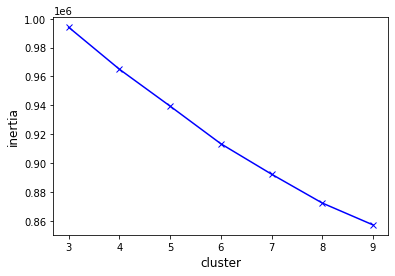

In [13]:
def get_inertia(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
    inertia = k_means.inertia_
    return inertia
 
inertia = []
for cluster_num in range(3, 10):
    inertia.append(get_inertia(cluster_num, X_norm))
 
plt.xlabel("cluster", fontsize=12)
plt.ylabel("inertia", fontsize=12)
plt.plot([i for i in range(3, 10)], inertia, 'xb-')

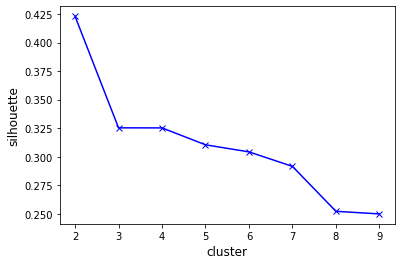

In [14]:
def get_silhouette(cluster_num, df):
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(df)
    silhouette = silhouette_score(df, k_means.labels_, metric='euclidean')
    return silhouette
from sklearn.metrics import silhouette_score
silhouettes = []
for i in range(2, 10):
    silhouettes.append(get_silhouette(i ,X_norm))
    
plt.xlabel("cluster", fontsize=12)
plt.ylabel("silhouette", fontsize=12)
plt.plot([i for i in range(2, 10)], silhouettes, 'xb-')

In [15]:
for label, group in df_sns.groupby('label'):
    means = group.iloc[:,:-1].mean().sort_values(ascending=False)
    print(means.head(10))

music       0.543619
god         0.310748
dance       0.212218
hair        0.184597
shopping    0.167150
band        0.156366
rock        0.153721
soccer      0.149906
cute        0.146854
church      0.134697
dtype: float64
hair      3.258065
sex       2.604301
music     2.183871
kissed    1.758065
die       1.291398
rock      1.120430
drugs     1.067742
god       0.936559
dance     0.933333
drunk     0.810753
dtype: float64
blonde      327.0
sex          22.0
hair         12.0
god          10.0
drunk         6.0
death         6.0
die           6.0
football      2.0
dress         2.0
rock          1.0
dtype: float64
dance       1.206682
music       1.093318
shopping    1.016258
cute        0.971715
hair        0.775278
mall        0.727171
god         0.581960
church      0.458129
clothes     0.406236
hot         0.397996
dtype: float64
hollister      1.513514
abercrombie    1.164512
shopping       0.928320
music          0.923619
hair           0.916569
dance          0.698002
mall  

In [18]:
from sklearn.mixture import GaussianMixture
import numpy as np

In [20]:
model = GaussianMixture(n_components=3, random_state=42)
predictions = model.fit_predict(X_norm)
np.unique(predictions, return_counts=True)

(array([0, 1, 2], dtype=int64), array([23426,  6573,     1], dtype=int64))

In [25]:
a = np.where(predictions == 2)
df_sns.iloc[a]

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,label
14187,0,2,0,0,0,1,0,0,0,0,...,0,0,1,0,0,6,6,6,0,2
